In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [20]:
(train_images,train_labels),_=mnist.load_data()


In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_images=train_images.reshape((60000,28*28))

In [23]:
train_images=train_images.astype("float32")/255

In [24]:
train_images_with_noise_channels=np.concatenate([train_images,np.random.random((len(train_images),784))],axis=1)

train_images_with_zeros_channels=np.concatenate([train_images,np.zeros((len(train_images),784))],axis=1)

Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6974 - loss: 1.1049 - val_accuracy: 0.9223 - val_loss: 0.2740
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9113 - loss: 0.2868 - val_accuracy: 0.9163 - val_loss: 0.2546
Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9554 - loss: 0.1565 - val_accuracy: 0.9640 - val_loss: 0.1226
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9731 - loss: 0.0954 - val_accuracy: 0.9722 - val_loss: 0.0954


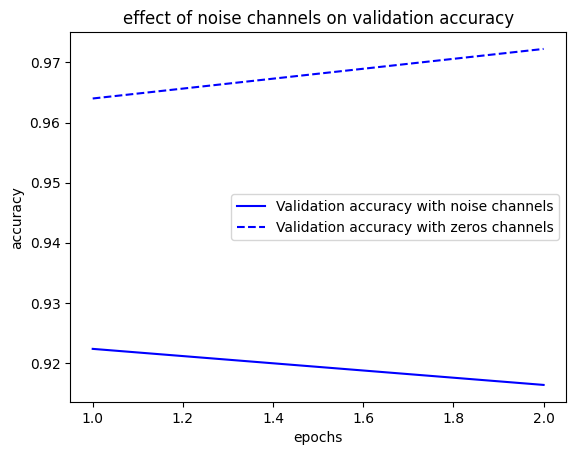

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model=keras.Sequential([layers.Dense(512,activation="relu"),layers.Dense(10,activation="softmax")])
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model



model=get_model()
history_noise=model.fit(train_images_with_noise_channels,train_labels,epochs=2,batch_size=128,validation_split=0.2)
history_zeros=model.fit(train_images_with_zeros_channels,train_labels,epochs=2,batch_size=128,validation_split=0.2)



import matplotlib.pyplot as plt
val_acc_noise=history_noise.history["val_accuracy"]
val_acc_zeros=history_zeros.history["val_accuracy"]
epochs=range(1,3)
plt.plot(epochs,val_acc_noise,"b-",label="Validation accuracy with noise channels")
plt.plot(epochs,val_acc_zeros,"b--",label="Validation accuracy with zeros channels")
plt.title("effect of noise channels on validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [ ]:
## training images with shuffled labels
(train_images,train_labels),_=mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
random_train_labels=train_labels[:]  #shallow copy

np.random.shuffle(random_train_labels)

model=keras.Sequential([layers.Dense(512,activation="relu"), layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,random_train_labels,epochs=5,batch_size=128,validation_split=0.2)

In [28]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),_=imdb.load_data(num_words=10000)

In [50]:
v=np.zeros((25000,10000)).astype("int")
tr=np.random.random(25000).astype("int")
for i ,j  in enumerate(tr):
    v[i,j]=1
    print(i,j)
    break


0 0


In [42]:
print(tr.shape)

(25000,)


In [61]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),_=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences,dimesions=100000):
    results=np.zeros((len(sequences),dimesions))
    for i , sequence in enumerate(sequences):
            results[i,sequence]=1.
    return results

train_data=vectorize_sequences(train_data)


ValueError: setting an array element with a sequence.

In [59]:
model=keras.Sequential([layers.Dense(16,activation="relu"), layers.Dense(16,activation="relu"), layers.Dense(1,activation="sigmoid")])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

history_original=model.fit(train_data,train_labels, epochs=3, batch_size=512, validation_split=0.3)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [6]:
# random fitting of DL model
#from tensorflow.keras.datasets import mnist
from keras.datasets import mnist
(train_images,train_labels),_=mnist.load_data()
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255

In [7]:
train_labels.shape

(60000,)

In [9]:
np.random.shuffle(train_labels)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([layers.Dense(512,activation="relu"), layers.Dense(1024,activation="relu"),  layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

history=model.fit(train_images,train_labels,epochs=2,batch_size=128,validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 6s 14ms/step - loss: 2.3096 - accuracy: 0.1041 - val_loss: 2.3054 - val_accuracy: 0.0978
Epoch 2/2
375/375 [==============================] - 5s 14ms/step - loss: 2.3017 - accuracy: 0.1118 - val_loss: 2.3058 - val_accuracy: 0.1110


In [14]:
history.history

{'loss': [2.30956768989563, 2.301687479019165],
 'accuracy': [0.1041041687130928, 0.11179167032241821],
 'val_loss': [2.3054091930389404, 2.3058278560638428],
 'val_accuracy': [0.09783333539962769, 0.11100000143051147]}

In [15]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(train_images, train_labels, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(train_images[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
469/469 [==============================] - 2s 4ms/step - loss: 2.2962 - accuracy: 0.1175
test loss, test acc: [2.2962486743927, 0.11753333359956741]
Generate predictions for 3 samples
1/1 [==============================] - 0s 154ms/step
predictions shape: (3, 10)


In [20]:
train_images[:3].shape

(3, 784)

In [17]:
train_labels[:3]

array([7, 7, 1], dtype=uint8)

In [31]:
indices_with_ones = np.where(train_images[:3] == 1)

In [32]:
indices_with_ones

(array([0, 1, 1, 2, 2], dtype=int64),
 array([161, 272, 412, 578, 662], dtype=int64))

In [33]:
num_ones = np.sum(train_images[:3] == 1)
print(f"Number of ones in the first three images: {num_ones}")

Number of ones in the first three images: 5


In [ ]:
for i in range(3):  # for the first three images
    indices = np.where(train_images[i] == 1)[0]
    print(f"Image {i} has active pixels at indices: {indices}")
    print(f"Number of active pixels in Image {i}: {len(indices)}")

    


Image 0 has active pixels at indices: [161]
Number of active pixels in Image 0: 1
Image 1 has active pixels at indices: [272 412]
Number of active pixels in Image 1: 2
Image 2 has active pixels at indices: [578 662]
Number of active pixels in Image 2: 2


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

vocabulary_size=10000
num_tags=100
num_depts=4

title=keras.Input(shape=(vocabulary_size,), name="title")
text=keras.Input(shape=(vocabulary_size,), name="text_body")
tags=keras.Input(shape=(num_tags,),name='tags')


In [ ]:
features=layers.Concatenate()([title,text,tags])
features=layers.Dense(64,activation="relu")(features)

priority=layers.Dense(1,activation="sigmoid",name='priority')(features)

department=layers.Dense(num_depts) 






In [ ]:

model=keras.Model(inputs=[title,text,tags], outputs=[priority,department])

In [ ]:



import numpy as np 
num_samples=128
vocabulary_size=1000
title_data=np.random.randint(0,2,size=(num_samples,vocabulary_size))
text_body_data=np.random.randint(0,2,size=(num_samples,num_depts))
tags_data=np.random.randint(0,2,size=(num_samples,num_tags))

priority_data=np.random.randint(0,2,size=(num_samples,num_depts))
dept_data=np.random.randint(0,2,size=(num_samples,num_depts))

model.compile(optimizer="rmrprop",loss=["mean_squared_error","categorical_crossentropy"],metrics=[["mean_absolute_error"],["accuracy"]])
model.fit([title_data,text_body_data,tags_data],[priority_data,dept_data],epochs=1)

model.evaluate([title_data,text_body_data,tags_data],[priority_data,dept_data])

priority_preds,dept_preds=model.predict([title_data,text_body_data,tags_data])








In [ ]:
#early stopping keras

callbacks_list=[keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2),
                keras.callbacks.ModelCheckpoint(filepath="checkpoint_path.keras",monitor="val_loss",save_best_only=True)]

#monitor the model's validation accuracy
#interrupt training when accuracy has stopped improving for 2 epochs
#save the current weights after every epoch

# path to destination file
# These two arguments mean you won't overwrite the model unless val_loss  has improved, which allows you to keep the best model seen during training

model=get_mnist_model()
model.compile(optimizer="rmrprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_labels,epochs=10,callbacks_list=callbacks_list, validation_data=(val_images,val_labels))

model.save("check_point_path")

